# 90%- missing explanation of results in problem 2; missing problem statement in #3

In [ ]:
from math import exp
from PSP_ThomasAlgorithm import ThomasBoundaryCondition
import PSP_grid as grid
import matplotlib.pyplot as plt
import piplite
await piplite.install('matplotlib')

In [ ]:
from __future__ import division
import numpy as np

# QnA:3.1: Derive the integration steps to obtain eqns (3.10) and (3.11) from eqn (3.7)..

#Kg = gas_conductance

#Dg = diffusion_coefficient (m^2/s)

#As = area_sphere = 4 * pi * x^2 (m^2)

#Ac = area_cylinder = 2 * pi * x (m^2)

# We know,
$$General Conductance Equation (gas)$$

$$Kg = \frac {Dg} {\int_{x_1}^{x_2}\ \frac {d(x)} {As(x)}}$$


##For Spherical Diffusion


Input the formula for As

$Kg = \frac {Dg} {\int_{x_1}^{x_2}\ \frac {d(x)} {4 \pi x^2}}$

Transfer the constants outside

$Kg = \frac {Dg} {\frac {1} {4 \pi} \int_{x_1}^{x_2}\ \frac {d(x)} {x^2}}$

Perform the integration

$Kg = \frac {Dg} {\frac {1} {4 \pi} \int_{x_1}^{x_2} (x^{-2}) dx}$

$Kg = \frac {Dg} {\frac {1} {4 \pi} \left (-\frac {1} {x} \bigg|_ {x_1}^{x_2} \right)}$

Simplify

$Kg = \frac {Dg} {\frac {1} {4 \pi} (-\frac {1} {x_2} + \frac {1} {x_1})}$

$Kg = \frac {Dg} {\frac {1} {4 \pi} (-\frac {x_1} {x_1 x_2} + \frac {x_2} {x_1 x_2})}$

$Kg = \frac {Dg} {\frac {1} {4 \pi} (\frac {x_2 - x_1} {x_1 x_2})}$

$Kg = \frac {Dg} {\frac {x_2 - x_1} {4 \pi x_1 x_2}}$


$$Equation for Spherical Diffusion (\frac {m^3} {s})$$  

$$Kg = \frac {Dg 4 \pi x_1 x_2} {x_2 - x_1}$$


          
          
##For Cylindrical Diffusion


Input the formula for Ac

$Kg = \frac {Dg} {\int_{x_1}^{x_2}\ \frac {d(x)} {2 \pi x}}$

Transfer the constants outside

$Kg = \frac {Dg} {\frac {1} {2 \pi} \int_{x_1}^{x_2}\ \frac {d(x)} {x}}$

Perform the Integration

$Kg = \frac {Dg} {\frac {1} {2 \pi} \int_{x_1}^{x_2}\ (x^{-1}) d(x)}$

$Kg = \frac {Dg} {\frac {1} {2 \pi} \left (\ln \bigg|_ {x_1}^{x_2}  \right)}$
   
Simplify

$Kg = \frac {Dg} {\frac {1} {2 \pi} (\ln(x_2) - \ln(x_1)}$

$Kg = \frac {Dg} {\frac {1} {2 \pi} \ln(\frac{x_2} {x_1})}$

$Kg = \frac {Dg} {\frac {\ln(\frac{x_2} {x_1})} {2 \pi}}$


$$Equation for Cylindrical Diffusion (\frac {m^2} {s})$$

$$Kg = \frac {Dg 2 \pi} {\ln(\frac {x_2} {x_1})}$$rms of $r_1$ and $r_2$, representing the radii at depths $x_1$ and $x_2$, respectively.


# QnA:3.2:

# Effect of Bulk Density:

node   depth [m]   Po2  Pco2
  0      0.00      0.210       0.000
  1      0.00      0.210       0.000
  2      0.03      0.207       0.003
  3      0.05      0.205       0.005
  4      0.08      0.203       0.007
  5      0.10      0.201       0.009
  6      0.12      0.199       0.011
  7      0.15      0.197       0.013
  8      0.17      0.196       0.014
  9      0.20      0.195       0.015
 10      0.22      0.194       0.016
 11      0.25      0.193       0.017
 12      0.27      0.192       0.018
 13      0.30      0.191       0.019
 14      0.33      0.191       0.019
 15      0.35      0.190       0.020
 16      0.38      0.190       0.020
 17      0.40      0.190       0.020
 18      0.43      0.190       0.020
 19      0.45      0.189       0.021
 20      0.48      0.189       0.021
 21      0.50      0.000       0.210
gas-filled porosity (cm3/cm3)
0.37


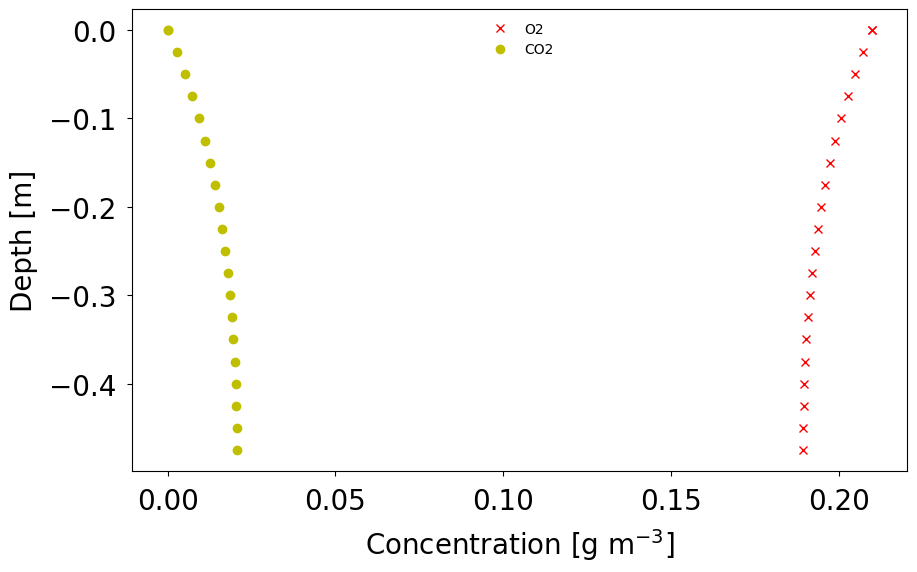

In [ ]:
def gasSolver(boundaryLayerCond, boundaryConc_O2, dg_O2,
                                respRate, totalDepth, n):
    a  = np.zeros(n+2, float)
    b  = np.zeros(n+2, float)
    c  = np.zeros(n+2, float)
    d  = np.zeros(n+2, float)
    g  = np.zeros(n+2, float)
    u  = np.zeros(n+2, float)
    co = np.zeros(n+2, float)

    g[0] = boundaryLayerCond
    co[0] = boundaryConc_O2
    # vector depth [m]
    z = grid.linear(n, totalDepth)

    # initialize matrix
    for i in range(1, n+1):
        u[i] = respRate * exp(-z[i] / 0.3) * (z[i + 1] - z[i - 1]) / 2.0
        if i < n:
            g[i] = dg_O2 / (z[i + 1] - z[i])
        else:
            g[i] = 0
        a[i + 1] = -g[i]
        b[i] = g[i - 1] + g[i]
        c[i] = -g[i]
        d[i] = u[i]

    d[1] = d[1] + g[0] * co[0]

    ThomasBoundaryCondition(a, b, c, d, co, 1, n)

    return(z, co)


def main():
    R = 8.3143
    n = 20
    totalDepth = 0.5
    bulkDensity = 1150.            #changed from 1200 to 1100 kg/m3
    particleDensity = 2650.
    waterContent = 0.2
    respRate = -0.001
    oxygenDiff = 1.55e-5           #changed from 1.39e-5 to 1.77e-5 for O2
    temperature = 25.
    atmPressure = 101.3
    boundaryLayerCond = 0.01
    volumeFrac_O2 = 0.21
    bg = 0.9
    mg = 2.3

    porosity = 1. - bulkDensity / particleDensity
    gasPorosity = porosity - waterContent


 # O2 concentration in air [g/m^3]
     #.21 is partial pressure of oxygen
    #equation 3.15
    boundaryConc_O2 = (volumeFrac_O2 * atmPressure * 1000. * 32. /
                          (R * (temperature + 273.15)))

 # O2 binary diffusion coefficient [m2/s]
    binaryDiffCoeff_O2 = (oxygenDiff * (101.3 / atmPressure)                  #equation 3.13
                * ((temperature + 273.15) / 273.15)**1.75)

    dg_O2 = binaryDiffCoeff_O2 * bg * gasPorosity**mg                         #equation 3.14

    z, co = gasSolver(boundaryLayerCond, boundaryConc_O2,
                      dg_O2, respRate, totalDepth, n)

    po = co * R * (temperature + 273.15) / (atmPressure * 1000. * 32.)        #partial pressure of O2

    pco2 = 0.21 - po           #partial pressure of CO2 assuming recipirocal relationship

    print ("node   depth [m]   Po2  Pco2")
    for i in range(n + 2):
        print ("%3d    %6.2f      %.3f       %.3f" %(i, z[i], po[i], pco2[i]))

    print ("gas-filled porosity (cm3/cm3)")
    print("%.2f" %(gasPorosity))

    # plot results
    fig = plt.figure(figsize=(10,6))
    for i in range(n+1):
        plt.plot(po[i], -z[i], 'rx', pco2[i], -z[i], 'yo')
    plt.legend(['O2', 'CO2'], loc="upper center", frameon = False)
    plt.xlabel('Concentration [g m$^{-3}$]',fontsize=20,labelpad=8)
    plt.ylabel('Depth [m]',fontsize=20,labelpad=8)
    plt.tick_params(axis='both', which='major', labelsize=20,pad=8)
    plt.tick_params(axis='both', which='minor', labelsize=20,pad=8)
    plt.show()
main()

# Effect of water content

node   depth [m]   Po2  Pco2
  0      0.00      0.210       0.000
  1      0.00      0.210       0.000
  2      0.03      0.206       0.004
  3      0.05      0.202       0.008
  4      0.08      0.199       0.011
  5      0.10      0.196       0.014
  6      0.12      0.193       0.017
  7      0.15      0.191       0.019
  8      0.17      0.189       0.021
  9      0.20      0.187       0.023
 10      0.22      0.186       0.024
 11      0.25      0.184       0.026
 12      0.27      0.183       0.027
 13      0.30      0.182       0.028
 14      0.33      0.181       0.029
 15      0.35      0.181       0.029
 16      0.38      0.180       0.030
 17      0.40      0.180       0.030
 18      0.43      0.179       0.031
 19      0.45      0.179       0.031
 20      0.48      0.179       0.031
 21      0.50      0.000       0.210
gas-filled porosity (cm3/cm3)
0.31


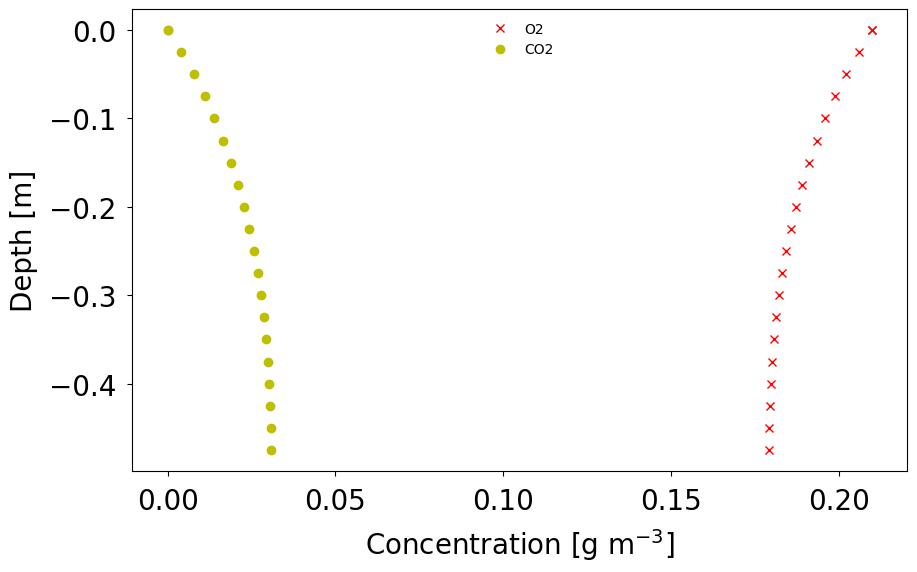

In [ ]:
def gasSolver(boundaryLayerCond, boundaryConc_O2, dg_O2,
                                respRate, totalDepth, n):
    a  = np.zeros(n+2, float)
    b  = np.zeros(n+2, float)
    c  = np.zeros(n+2, float)
    d  = np.zeros(n+2, float)
    g  = np.zeros(n+2, float)
    u  = np.zeros(n+2, float)
    co = np.zeros(n+2, float)

    g[0] = boundaryLayerCond
    co[0] = boundaryConc_O2
    # vector depth [m]
    z = grid.linear(n, totalDepth)

    # initialize matrix
    for i in range(1, n+1):
        u[i] = respRate * exp(-z[i] / 0.3) * (z[i + 1] - z[i - 1]) / 2.0
        if i < n:
            g[i] = dg_O2 / (z[i + 1] - z[i])
        else:
            g[i] = 0
        a[i + 1] = -g[i]
        b[i] = g[i - 1] + g[i]
        c[i] = -g[i]
        d[i] = u[i]

    d[1] = d[1] + g[0] * co[0]

    ThomasBoundaryCondition(a, b, c, d, co, 1, n)

    return(z, co)


def main():
    R = 8.3143
    n = 20
    totalDepth = 0.5
    bulkDensity = 1200.
    particleDensity = 2650.
    waterContent = 0.24 #change from 0.2 to 0.3
    respRate = -0.001
    oxygenDiff = 1.55e-5           #changed from 1.39e-5 to 1.77e-5 for O2
    temperature = 25.
    atmPressure = 101.3
    boundaryLayerCond = 0.01
    volumeFrac_O2 = 0.21
    bg = 0.9
    mg = 2.3

    porosity = 1. - bulkDensity / particleDensity
    gasPorosity = porosity - waterContent


 # O2 concentration in air [g/m^3]
     #.21 is partial pressure of oxygen
    #equation 3.15
    boundaryConc_O2 = (volumeFrac_O2 * atmPressure * 1000. * 32. /
                          (R * (temperature + 273.15)))

 # O2 binary diffusion coefficient [m2/s]
    binaryDiffCoeff_O2 = (oxygenDiff * (101.3 / atmPressure)                  #equation 3.13
                * ((temperature + 273.15) / 273.15)**1.75)

    dg_O2 = binaryDiffCoeff_O2 * bg * gasPorosity**mg                         #equation 3.14

    z, co = gasSolver(boundaryLayerCond, boundaryConc_O2,
                      dg_O2, respRate, totalDepth, n)

    po = co * R * (temperature + 273.15) / (atmPressure * 1000. * 32.)        #partial pressure of O2

    pco2 = 0.21 - po           #partial pressure of CO2 assuming recipirocal relationship

    print ("node   depth [m]   Po2  Pco2")
    for i in range(n + 2):
        print ("%3d    %6.2f      %.3f       %.3f" %(i, z[i], po[i], pco2[i]))

    print ("gas-filled porosity (cm3/cm3)")
    print("%.2f" %(gasPorosity))

    # plot results
    fig = plt.figure(figsize=(10,6))
    for i in range(n+1):
        plt.plot(po[i], -z[i], 'rx', pco2[i], -z[i], 'yo')
    plt.legend(['O2', 'CO2'], loc="upper center", frameon = False)
    plt.xlabel('Concentration [g m$^{-3}$]',fontsize=20,labelpad=8)
    plt.ylabel('Depth [m]',fontsize=20,labelpad=8)
    plt.tick_params(axis='both', which='major', labelsize=20,pad=8)
    plt.tick_params(axis='both', which='minor', labelsize=20,pad=8)
    plt.show()
main()

# Effect of Boundary layer Conduction

node   depth [m]   Po2  Pco2
  0      0.00      0.210       0.000
  1      0.00      0.210       0.000
  2      0.03      0.207       0.003
  3      0.05      0.204       0.006
  4      0.08      0.202       0.008
  5      0.10      0.199       0.011
  6      0.12      0.198       0.012
  7      0.15      0.196       0.014
  8      0.17      0.194       0.016
  9      0.20      0.193       0.017
 10      0.22      0.192       0.018
 11      0.25      0.191       0.019
 12      0.27      0.190       0.020
 13      0.30      0.189       0.021
 14      0.33      0.188       0.022
 15      0.35      0.188       0.022
 16      0.38      0.187       0.023
 17      0.40      0.187       0.023
 18      0.43      0.187       0.023
 19      0.45      0.187       0.023
 20      0.48      0.187       0.023
 21      0.50      0.000       0.210
gas-filled porosity (cm3/cm3)
0.35


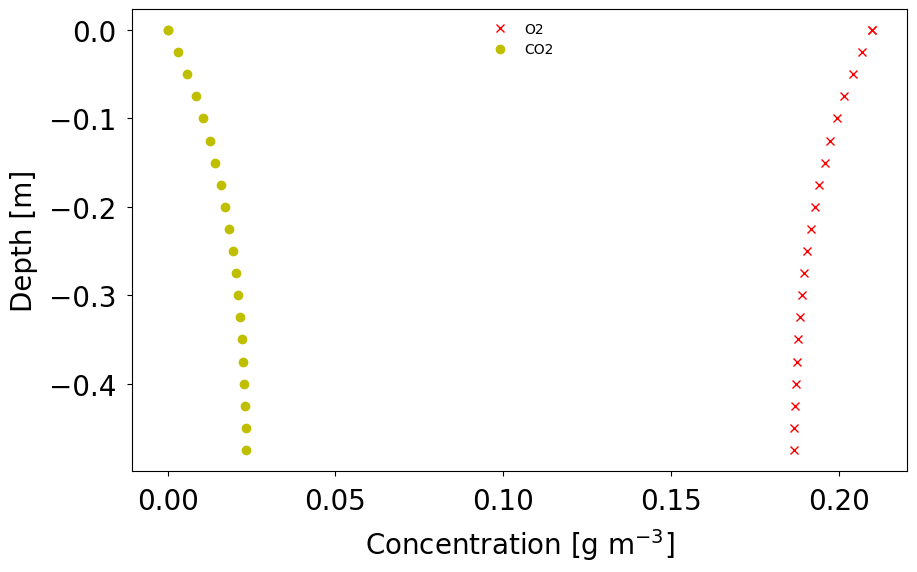

In [ ]:
def gasSolver(boundaryLayerCond, boundaryConc_O2, dg_O2,
                                respRate, totalDepth, n):
    a  = np.zeros(n+2, float)
    b  = np.zeros(n+2, float)
    c  = np.zeros(n+2, float)
    d  = np.zeros(n+2, float)
    g  = np.zeros(n+2, float)
    u  = np.zeros(n+2, float)
    co = np.zeros(n+2, float)

    g[0] = boundaryLayerCond
    co[0] = boundaryConc_O2
    # vector depth [m]
    z = grid.linear(n, totalDepth)

    # initialize matrix
    for i in range(1, n+1):
        u[i] = respRate * exp(-z[i] / 0.3) * (z[i + 1] - z[i - 1]) / 2.0
        if i < n:
            g[i] = dg_O2 / (z[i + 1] - z[i])
        else:
            g[i] = 0
        a[i + 1] = -g[i]
        b[i] = g[i - 1] + g[i]
        c[i] = -g[i]
        d[i] = u[i]

    d[1] = d[1] + g[0] * co[0]

    ThomasBoundaryCondition(a, b, c, d, co, 1, n)

    return(z, co)


def main():
    R = 8.3143
    n = 20
    totalDepth = 0.5
    bulkDensity = 1200.
    particleDensity = 2650.
    waterContent = 0.2
    respRate = -0.001
    oxygenDiff = 1.55e-5           #changed from 1.39e-5 to 1.77e-5 for O2
    temperature = 25.
    atmPressure = 101.3
    boundaryLayerCond = 0.06  #change from 0.01 to 0.001
    volumeFrac_O2 = 0.21
    bg = 0.9
    mg = 2.3

    porosity = 1. - bulkDensity / particleDensity
    gasPorosity = porosity - waterContent


 # O2 concentration in air [g/m^3]
     #.21 is partial pressure of oxygen
    #equation 3.15
    boundaryConc_O2 = (volumeFrac_O2 * atmPressure * 1000. * 32. /
                          (R * (temperature + 273.15)))

 # O2 binary diffusion coefficient [m2/s]
    binaryDiffCoeff_O2 = (oxygenDiff * (101.3 / atmPressure)                  #equation 3.13
                * ((temperature + 273.15) / 273.15)**1.75)

    dg_O2 = binaryDiffCoeff_O2 * bg * gasPorosity**mg                         #equation 3.14

    z, co = gasSolver(boundaryLayerCond, boundaryConc_O2,
                      dg_O2, respRate, totalDepth, n)

    po = co * R * (temperature + 273.15) / (atmPressure * 1000. * 32.)        #partial pressure of O2

    pco2 = 0.21 - po           #partial pressure of CO2 assuming recipirocal relationship

    print ("node   depth [m]   Po2  Pco2")
    for i in range(n + 2):
        print ("%3d    %6.2f      %.3f       %.3f" %(i, z[i], po[i], pco2[i]))

    print ("gas-filled porosity (cm3/cm3)")
    print("%.2f" %(gasPorosity))

    # plot results
    fig = plt.figure(figsize=(10,6))
    for i in range(n+1):
        plt.plot(po[i], -z[i], 'rx', pco2[i], -z[i], 'yo')
    plt.legend(['O2', 'CO2'], loc="upper center", frameon = False)
    plt.xlabel('Concentration [g m$^{-3}$]',fontsize=20,labelpad=8)
    plt.ylabel('Depth [m]',fontsize=20,labelpad=8)
    plt.tick_params(axis='both', which='major', labelsize=20,pad=8)
    plt.tick_params(axis='both', which='minor', labelsize=20,pad=8)
    plt.show()
main()

# QnA:3.3:

node   depth [m]   Po2  Pco2
  0      0.00      0.210       0.000
  1      0.00      0.210       0.000
  2      0.03      0.206       0.004
  3      0.05      0.203       0.007
  4      0.08      0.200       0.010
  5      0.10      0.197       0.013
  6      0.12      0.194       0.016
  7      0.15      0.192       0.018
  8      0.17      0.190       0.020
  9      0.20      0.189       0.021
 10      0.22      0.187       0.023
 11      0.25      0.186       0.024
 12      0.27      0.185       0.025
 13      0.30      0.184       0.026
 14      0.33      0.183       0.027
 15      0.35      0.182       0.028
 16      0.38      0.182       0.028
 17      0.40      0.181       0.029
 18      0.43      0.181       0.029
 19      0.45      0.181       0.029
 20      0.48      0.181       0.029
 21      0.50      0.000       0.210
gas-filled porosity
0.30


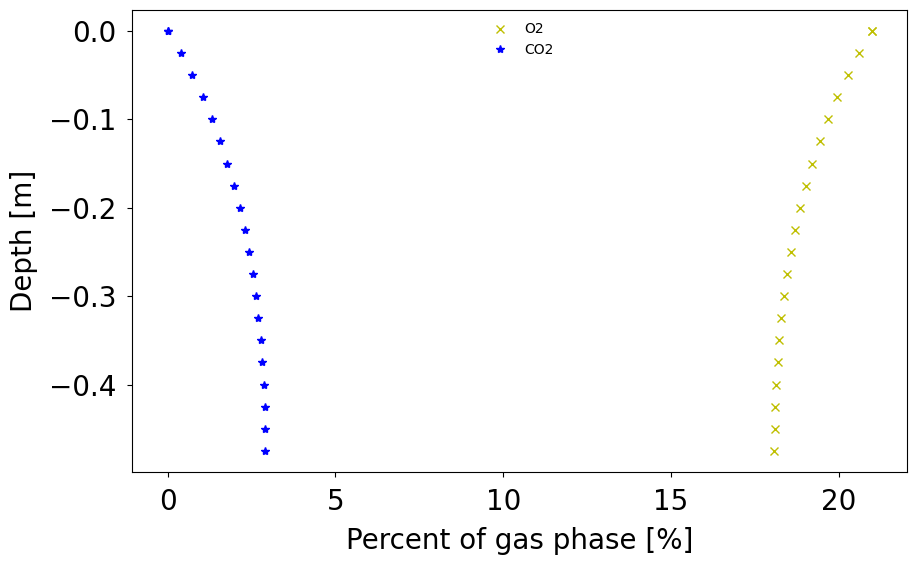

In [ ]:
#PSP_gasDiffusion

def gasSolver(boundaryLayerCond, boundaryOxygenConc, dg,
                                respRate, totalDepth, n):
    a  = np.zeros(n+2, float)
    b  = np.zeros(n+2, float)
    c  = np.zeros(n+2, float)
    d  = np.zeros(n+2, float)
    g  = np.zeros(n+2, float)
    u  = np.zeros(n+2, float)
    co = np.zeros(n+2, float)

    g[0] = boundaryLayerCond
    co[0] = boundaryOxygenConc
    # vector depth [m]
    z = grid.linear(n, totalDepth)

    # initialize matrix
    for i in range(1, n+1):
        u[i] = respRate * exp(-z[i] / 0.3) * (z[i + 1] - z[i - 1]) / 2.0
        if i < n:
            g[i] = dg / (z[i + 1] - z[i])
        else:
            g[i] = 0 #no flux at the bottom so g(i)=0
        a[i + 1] = -g[i]
        b[i] = g[i - 1] + g[i]
        c[i] = -g[i]
        d[i] = u[i]

    d[1] = d[1] + g[0] * co[0]

    ThomasBoundaryCondition(a, b, c, d, co, 1, n)

    return(z, co)


def main():
    R = 8.3143
    n = 20
    totalDepth = 0.5
    bulkDensity = 1200.
    particleDensity = 2650.
    waterContent = 0.25      #change from 0.2 to 0.3
    respRate = -0.001
    oxygenDiff = 1.77e-5  #this is the value for oxygen
    temperature = 25.
    atmPressure = 101.3
    boundaryLayerCond = 0.06   #changed from 0.01 to 0.001
     # O2 concentration in air [g/m^3]
    #.21 is partial pressure of oxygen
    #equation 3.15
    boundaryOxygenConc = (0.21 * atmPressure * 1000. * 32. /
                          (R * (temperature + 273.15)))
    porosity = 1. - bulkDensity / particleDensity
    gasPorosity = porosity - waterContent

    #  binary diffusion coefficient [m2/s]
    #101.3 written here is standard atm pressure
    binaryDiffCoeff = (oxygenDiff * (101.3 / atmPressure)
                * ((temperature + 273.15) / 273.15)**1.75)

    bg = 0.9
    mg = 2.3
    dg = binaryDiffCoeff * bg * gasPorosity**mg

    z, co = gasSolver(boundaryLayerCond, boundaryOxygenConc,
                      dg, respRate, totalDepth, n)

    po = co * R * (temperature + 273.15) / (atmPressure * 1000. * 32.) # partial pressure of O2

    pco2 = 0.21 - po #partial pressure of CO2 assuming recipirocal relationship

    print ("node   depth [m]   Po2  Pco2")
    for i in range(n + 2):
        print ("%3d    %6.2f      %.3f       %.3f" %(i, z[i], po[i], pco2[i]))

    print ("gas-filled porosity")
    print("%.2f" %(gasPorosity))

    # plot results
    fig = plt.figure(figsize=(10,6))
    for i in range(n+1):
        plt.plot(100*po[i], -z[i], 'yx', 100*pco2[i], -z[i], 'b*')
    plt.legend(['O2', 'CO2'], loc="upper center", frameon = False)
    plt.xlabel('Percent of gas phase [%]',fontsize=20,labelpad=8)
    plt.ylabel('Depth [m]',fontsize=20,labelpad=8)
    plt.tick_params(axis='both', which='major', labelsize=20,pad=8)
    plt.tick_params(axis='both', which='minor', labelsize=20,pad=8)
    plt.show()
main()